In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error

Using TensorFlow backend.


In [2]:
epochs=50
batch_size=64
learning_rate=0.01
num_outputs=1
num_features=100

In [3]:
feats = pd.read_csv("../data/processed/train_features.csv")
target = pd.read_csv("../data/processed/train_target.csv")

feats.set_index('card_id', inplace=True)
target.set_index('card_id', inplace=True)

In [4]:
X = feats.values
y = target.values.reshape(-1)

# 10 Feature perceptron

In [5]:
regr = LinearRegression()
selector = RFE(regr, 10, step=1, verbose=0)

In [6]:
selector.fit(X, y)

/Users/kennedymurphy/elo/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=10, step=1, verbose=0)

In [7]:
usecols = feats.columns[selector.support_]
X = X[:, selector.support_]

num_inputs = X.shape[1]

In [8]:
# model = Sequential()
# model.add(Dense(batch_size, input_dim=num_inputs, kernel_initializer='normal', activation='relu'))
# model.add(Dense(num_outputs, kernel_initializer='normal'))
# # Compile model
# model.compile(optimizer='rmsprop', loss='mse')

# print(f"Starting training process with epochs:{epochs} & batch size:{batch_size}")
# model.fit(X, y, epochs=epochs, batch_size=batch_size)

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Validation

In [9]:
val_feats = pd.read_csv("../data/processed/validation_features.csv", usecols=usecols)
val_target = pd.read_csv("../data/processed/validation_target.csv")

X_val = val_feats.values
y_val = val_target.target.values

y_pred = model.predict(X_val)

In [10]:
print("MAE: %f" % mean_absolute_error(y_val, y_pred))
print("MSE: %f" % mean_squared_error(y_val, y_pred))

MAE: 1.584813
MSE: 14.593910


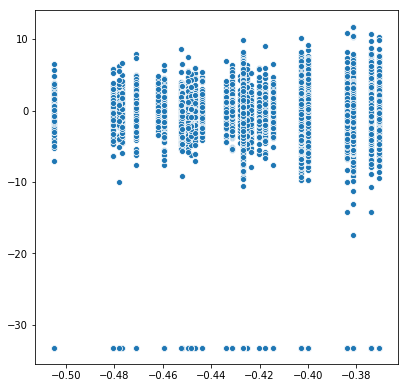

In [11]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x=y_pred.reshape(-1), y=y_val)

In [31]:
y_pred.shape

(40383, 1)